### Code to generate the maze

In [0]:
# Import libraries

import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import math
import queue as Q
from matplotlib.colors import ListedColormap
import time
import pprint as pp
import pandas as pd

In [0]:
# Function to generate maze of given dimension. It takes 'p' as the probability of a particular cell being blocked.

def generate_maze(dim = 10, p = 0.4):
    
    rows = dim
    cols = dim
    mat = np.ones((dim,dim))   
    
    for i in range(rows):
        for j in range(cols):
            if( rand.uniform(0,1) < p ):    ## if random number is greater than p, cell is assinged as blocked
                mat[i][j] = 0
    
    mat[0][0] = 1 # start
    mat[dim-1][dim-1] = 1 # goal
    
    return mat 

In [0]:
# Function to visualize a maze

def visualise_maze(maze):
  
  ax = sns.heatmap(maze, linewidths=.5, cbar=False)
  plt.show()

### Search Algorithms:

In [0]:
# Function to check whether a given child cell is valid for exploring (adding to the fringe). Returns boolean indicating validity.

def check_child_validity(maze,vertex,visited):
    
    dim = maze.shape[0] 
    
    # If dimensions are in the range of the matrix dimensions (if cell is going out of bounds)
    if vertex[0]==-1 or vertex[1]==-1 or vertex[0]==dim or vertex[1]==dim:
        return False
      
    # If cell is closed or already visited
    elif maze[vertex[0],vertex[1]]==0 or vertex in visited:
        return False
    
    # Valid
    else:
        return True  

In [0]:
# Function to generate neighbours of a given cell

def create_child_nodes(maze,visited,x,y):
  child_list = []
  
  node1 = (x+1,y)   # Right neighbor
  if(check_child_validity(maze,node1, visited)):
    child_list.append(node1)
                
  node2 = (x,y+1)   # Bottom neighbor
  if(check_child_validity(maze,node2, visited)):
    child_list.append(node2)

  node3 = (x-1,y)   # Left neighbor
  if(check_child_validity(maze,node3, visited)):
    child_list.append(node3)

  node4 = (x,y-1)   # Top neighbor
  if(check_child_validity(maze,node4, visited)):
    child_list.append(node4)
  
  return child_list

## BFS

In [0]:
# Function to implement Breadth First Search

def BFS(maze,start,goal):
  
    fringe = []
    fringe.append(start)
    visited = []    
    prev_list = {}  # To store pointers for backtracking
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while(fringe):
        vertex = fringe.pop(0)
        max_fringe_size = max(max_fringe_size, len(fringe))
        count_of_nodes+=1

        if vertex == goal:   # checking Goal state 
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
            
        i = vertex[0]
        j = vertex[1]
            
        # Generating and adding child nodes in fringe 
        child = create_child_nodes(maze,visited,i,j)
        if child:
            for c in child:
                prev_list[c] = vertex
                fringe.append(c)
                visited.append(c)

    return 0, prev_list, count_of_nodes, max_fringe_size, visited

## DFS

In [0]:
# Function to implement Breadth First Search

def DFS(maze, start, goal):
    
    fringe = [start]
    visited = [start]
    prev_list = {}
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while fringe:
        (i, j) = fringe.pop()
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, len(fringe) )
        
        if (i, j) == goal:
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
           
        # Generating and adding child nodes in fringe 
        child = create_child_nodes(maze,visited,i,j)
        if child:
            for c in child:
                prev_list[c] = (i,j)
                fringe.append(c)
                visited.append(c)

    return 0, prev_list, count_of_nodes, max_fringe_size, visited

##Improved DFS (2.7)
For DFS, can you improve the performance of the algorithm by choosing what order to load the neighboring
rooms into the fringe? What neighbors are `worth' looking at before others? Be thorough and justify yourself.

In [0]:
def prioritize_children(maze, goal, visited, x, y):
  
    children = []
    node = []
    h = []
    
    node.append((x+1, y))
    h.append((goal - node[0][0]) + (goal - node[0][1]))
    #n.append(len(create_child_nodes(maze, visited, node1[0], node1[1])))
    
    node.append((x, y+1))
    h.append((goal - node[1][0]) + (goal - node[1][1]))
    #n.append(len(create_child_nodes(maze, visited, node2[0], node2[1])))
    
    node.append((x-1, y))
    h.append((goal - node[2][0]) + (goal - node[2][1]))
    #n.append(len(create_child_nodes(maze, visited, node3[0], node3[1])))
    
    node.append((x, y-1))
    h.append((goal - node[3][0]) + (goal - node[3][1]))
    #n.append(len(create_child_nodes(maze, visited, node4[0], node4[1])))
    
    for i in range(4):
        ind = h.index(min(h))
        h.pop(ind)
        current_child = node.pop(ind)
        if(check_child_validity(maze,current_child,visited)):
            children.append(current_child)
    
    children.reverse()
    return children

In [0]:
def improved_DFS(maze, start, goal):
  
    fringe = [start]
    visited = [start]
    prev_list = {}
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    while fringe:
        (i, j) = fringe.pop()
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, len(fringe) )
        
        if (i, j) == goal:
            return 1, prev_list, count_of_nodes, max_fringe_size
           
        # Generating and adding child nodes in fringe 
        children = prioritize_children(maze,goal[0]-1,visited,i,j)
        if children:
          for c in children:
            prev_list[c] = (i,j)
            fringe.append(c)
            visited.append(c)
     
    return 0, prev_list, count_of_nodes, max_fringe_size

### Bi-directional BFS:

In [0]:
def biBFS(maze,visited,fringe,prev_list,count_of_nodes,max_fringe_size):
  
  vertex = fringe.pop(0)
  count_of_nodes+=1
  max_fringe_size = max( max_fringe_size, len(fringe))
            
  i = vertex[0]
  j = vertex[1]
            
  # Generating and adding child nodes in fringe 
  
  child = create_child_nodes(maze,visited,i,j)
  if child:
    for c in child:
      prev_list[c] = vertex
      fringe.append(c)
      visited.append(c) 
    
  return visited, fringe, prev_list, count_of_nodes, max_fringe_size

In [0]:
def isIntersecting(s_visited,g_visited):
  
    for c in s_visited:
        if(c in g_visited):
            return c
    return (-1,-1)

In [0]:
def BiDirectionalBFS(maze, start, goal):
  
    count_of_nodes = 0
    max_fringe_size = 0
  
    s_visited = []
    g_visited = []
    s_visited.append(start)
    g_visited.append(goal)
  
    s_prev = {}
    g_prev = {}
  
    s_fringe = [start]
    g_fringe = [goal]
  
  
    intersectionNode = (-1,-1)
  
    while(s_fringe and g_fringe):
    
        s_visited, s_fringe, s_prev, count_of_nodes, max_fringe_size = biBFS(maze,s_visited,s_fringe,s_prev,count_of_nodes,max_fringe_size)
        g_visited, g_fringe, g_prev,count_of_nodes, max_fringe_size = biBFS(maze,g_visited,g_fringe,g_prev,count_of_nodes,max_fringe_size)
      
        intersectionNode = isIntersecting(s_visited, g_visited)
      
        if intersectionNode!=(-1,-1):
            print("Intersection at cell:")
            print(intersectionNode)

            return 1, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size
      
    return 0, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size


## A*

In [0]:
def A_star_heuristic(maze, h, goal, heuristic):    
    
    dim = maze.shape[0]
    
    for i in range(dim):
        for j in range(dim): 
            if(heuristic == "manhattan"):
                h[i][j] = ( abs(goal[0]-i) + abs(goal[1]-j) )

            if(heuristic == "euclidean"):
                h[i][j] = math.sqrt( (goal[0] - i)**2 + (goal[1]-j)**2 ) 
    

In [0]:
def A_star(maze, start, goal, heuristic):
    
    dim = maze.shape[0]
    
    h = np.zeros((dim, dim))
    g = np.zeros((dim,dim))
    f = np.zeros((dim,dim))
    
    g[start] = 0
    A_star_heuristic( maze, h, goal, heuristic)
    f = g + h 
    
    visited = []
    prev_list = {} 
    
    count_of_nodes = 0
    max_fringe_size = 0
    
    fringe = Q.PriorityQueue()
    fringe.put((f[start], start))

     # To store pointers for backtracking
    
    
    while not (fringe.empty()):
        
        
        vertex = fringe.get()[1]
        count_of_nodes+=1
        max_fringe_size = max( max_fringe_size, fringe.qsize() )
        visited.append(vertex)
        
        if vertex == goal:
            return 1, prev_list, count_of_nodes, max_fringe_size, visited
        
        i = vertex[0]
        j = vertex[1] 

        # Generating and adding child nodes in fringe 
        child = create_child_nodes(maze,visited,i,j)
        if child:
            for c in child:
                prev_list[c] = vertex
                visited.append(c)
                g[c] = g[vertex] + 1
                f[c] = g[c] + h[c]
                fringe.put((f[c], c))
    
    return 0, prev_list, count_of_nodes, max_fringe_size, visited  # No path found

In [0]:
def display_path(maze_temp, prev_list, start, goal):
  
    prev_node = goal
    path = [prev_node]
    maze_temp[prev_node] = 25
    
    if bool(prev_list):
      while(prev_list[prev_node] != start):
        current_node = prev_node
        prev_node = prev_list[(current_node)]
        path.append(prev_node)
        maze_temp[prev_node] = 50
        
      path.append(prev_list[prev_node])
      path.reverse()
      maze_temp[prev_list[prev_node]] = 25
      
      path_length = str(len(path))

#       sns.heatmap(maze_temp, cmap=ListedColormap(['black', 'green', 'crimson', 'papayawhip']), linewidths=.5,  cbar=False)
#       plt.show()
      
      return path_length

In [0]:
def path_length(goal, prev_list, start):
    
    prev_node = goal
    path = [prev_node]
    path_len = 0
    
    if bool(prev_list):
        while(prev_node in prev_list.keys() and prev_list[prev_node] != start):
            current_node = prev_node
            prev_node = prev_list[(current_node)]
            path.append(prev_node)
        
        path.append(prev_list[prev_node])
        path.reverse()

        path_len = len(path)
    
    return path_len 

##2.1
Find a map size (dim) that is large enough to produce maps that require some work to solve, but small enough
that you can run each algorithm multiple times for a range of possible p values. How did you pick a dim?

dim= 50
dim= 100
dim= 150
dim= 200
dim= 250
dim= 300


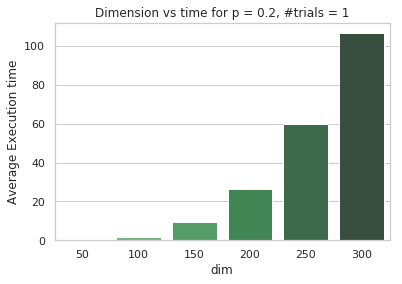

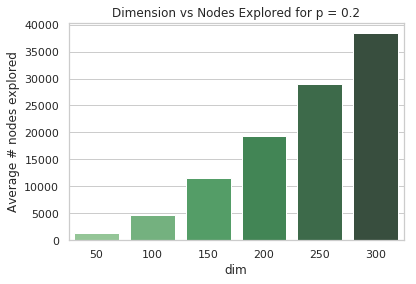

dim =  [ 50 100 150 200 250 300]
Average_time =  [0.1491, 1.5397, 9.2972, 26.5221, 59.9349, 106.482]
Average nodes explored =  [1403.0, 4744.0, 11642.0, 19354.0, 28925.0, 38405.0]


In [0]:
##some work to solve - nodes explored ##

def optimal_dim():
    
    #start = (0,0)
    dim_start = 50 
    dim_end = 350
    jump = 50
    p = 0.2
    n_trials = 1   
    time_list = []
    nodes_explored = []
    
    
    for dim in range(dim_start,dim_end, jump):
        
        goal = (dim-1,dim-1)
        flag = 0
        time_average = []
        count_of_nodes_average = []
        #print()
        print("dim=", dim)
        
        for n in range(n_trials):
            
            flag = 0
            #print("n_trials = ", n+1)
            counter = 1
            while( flag == 0):

                #print(counter)
                counter + 1
                maze = generate_maze(dim, p)
                start_time = time.time()          
                is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited  = A_star(maze, start, goal, "manhattan")
                current_time = round(time.time() - start_time, 4)
                flag = is_goal_reached
#                 if(is_goal_reached):
#                     print("Goal Reached")
                
            #print(n_trials)
            #print(count_of_nodes)
            if is_goal_reached:
              time_average.append(current_time)
              count_of_nodes_average.append(count_of_nodes)
          
        
        #print(dim, count_of_nodes_average)
        time_list.append(sum(time_average)/len(time_average))
        nodes_explored.append(sum(count_of_nodes_average)/ len(count_of_nodes_average))
    
   
    
    x = np.arange(dim_start, dim_end, jump)
    
    
    ## PLOT TIME ####
    
    plt.close()
    sns.set(style="whitegrid", color_codes=True)
    pal = sns.color_palette("Greens_d", len(time_list))
    sns.barplot(x, time_list, palette = np.array(pal[::-1]) )
   
    plt.xlabel("dim")
    plt.ylabel("Average Execution time")
    plt.title("Dimension vs time for p = "+ str(p)+ ", #trials = " + str(n_trials))
    plt.show()
    
    ### PLOT NO. OF NODES ###
    sns.set(style="whitegrid", color_codes=True)
    pal = sns.color_palette("Greens_d", len(nodes_explored))
   
    sns.barplot(x, nodes_explored, palette=np.array(pal[::-1]))
    plt.xlabel("dim")
    plt.ylabel("Average # nodes explored")
    plt.title("Dimension vs Nodes Explored for p = "+ str(p))
    

    plt.show()
    
    
    
    print("dim = ", x)
    print("Average_time = ", time_list)
    print("Average nodes explored = ", nodes_explored)

optimal_dim()

In [0]:
##some work to solve - nodes explored ##

def optimal_dim_with_variable_p():
    
    #dim_range = np.arange(10,17,1)
    dim_range = np.arange(50,300,50)
    p_range = np.arange(0.1, 0.5, 0.1)  
    time_list = []
    nodes_explored = []
    
    df_time = pd.DataFrame(index= dim_range,  columns = p_range)
    df_nodes = pd.DataFrame(index= dim_range, columns = p_range)
    
    for dim in dim_range:
        
        goal = (dim-1,dim-1)
        flag = 0
        time_average = []
        count_of_nodes_average = []
        
       
        
        for p in p_range:
            
           
            is_goal_reached = 0
            
            while( is_goal_reached == 0 ):
                maze = generate_maze(dim, p)
                start_time = time.time()          
                is_goal_reached, prev_list, count_of_nodes, max_fringe_size  = improved_DFS(maze, start, goal)
                current_time = round(time.time() - start_time, 4) 
            
            df_time.loc[dim][p] = current_time
            df_nodes.loc[dim][p] = count_of_nodes
            
    print("Time")
    print(df_time)
    print("Nodes")
    print(df_nodes)
    
    
    #colors = ['rosybrown','firebrick' , 'violet', 'cyan', 'darkslategrey']
    colors = ["purple", 'olive', 'cyan', 'red', 'green', 'rosybrown', 'darkblue']
    plot_legend_label = "dim "
    plot_legend_value = dim_range
    
    for i in range(df_time.shape[0]):
      plt.plot(df_time.iloc[i].index, df_time.iloc[i].values,
      label= plot_legend_label+"=%d"%(plot_legend_value[i]), 
               marker='o', color=colors[i])
      
      plt.legend()
    
    plt.xlabel('p')
    plt.ylabel('Time')
    plt.xticks(np.arange(0.1, 0.5, 0.1))
    #plt.title("Dimension vs time for p = "+ str(p)+ ", #trials = " + str(n_trials))
    plt.show()
    
    
    ## NODES ##
    
    
    for i in range(df_nodes.shape[0]):
      plt.plot(df_nodes.iloc[i].index, df_nodes.iloc[i].values,
      label= plot_legend_label+"=%d"%(plot_legend_value[i]), 
               marker='o', color=colors[i])
      
      plt.legend()
    
    plt.xlabel('p')
    plt.ylabel('#Nodes Explored')
    plt.xticks(np.arange(0.1, 0.5, 0.1))
    #plt.title("Dimension vs time for p = "+ str(p)+ ", #trials = " + str(n_trials))
    plt.show()
    


Time
        0.1     0.2     0.3     0.4
50   0.0021  0.0033  0.0038  0.0104
100  0.0067  0.0469  0.0487  0.3648
150  0.0128  0.0202  0.0151  0.0978
200  0.0193  0.0218  0.0389  0.1856
250  0.0272  0.0517  0.4467  0.9677
Nodes
     0.1  0.2   0.3   0.4
50   107  130   162   443
100  213  969  1065  3469
150  335  562   462  1638
200  443  532   827  2286
250  539  937  3627  5854


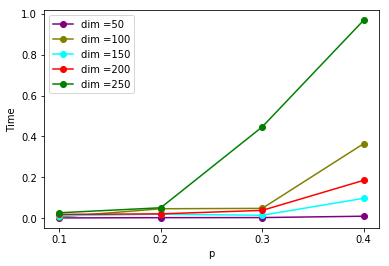

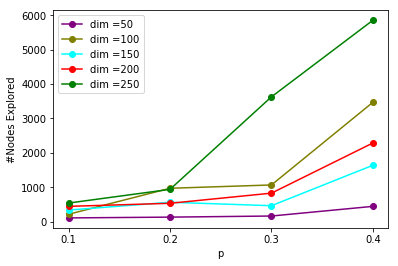

In [30]:
start = (0,0)
optimal_dim_with_variable_p()

##2.2 & 2.6
For p = 0.2, generate a solvable map, and show the paths returned for each algorithm. Do the results make
sense? 
Do these algorithms behave as they should?

In [0]:
def solve_maze():
  
    path_length = 0
    
    ## LIST of fators ##
    algo_list = [ "BFS", "DFS", "Improved_DFS", "A_Manhattan", "A_Euclidean", "BD_BFS"]
    factor_list = ["path_length", "time", "nodes_explored", "max_fringe_size"] 
    df = pd.DataFrame(columns= factor_list, index=algo_list)

  
    print("---------Maze Generated---------")
    maze = generate_maze(dim, p)
      maze_temp = maze                   ## maze_temp is used for visualisation 
    maze_temp[0][0] = 0.5                   
    maze_temp[dim-1][dim-1] = 0.5
    sns.heatmap(maze_temp, cmap=ListedColormap(['black', 'green', 'papayawhip']), linewidths=.5,  cbar=False)
    plt.show()
    
    

    ##  BFS  ###
    print("---------BFS---------")
    
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = BFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        #print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

        
    
    df.loc["BFS"]["time"] = current_time
    df.loc["BFS"]["nodes_explored"] = count_of_nodes
    df.loc["BFS"]["path_length"] = path_length
    df.loc["BFS"]["max_fringe_size"] = max_fringe_size
    

    ## DFS ##
    print("\n---------DFS---------")
    
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited  = DFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
   
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    
    df.loc["Improved_DFS"]["time"] = current_time
    df.loc["Improved_DFS"]["nodes_explored"] = count_of_nodes
    df.loc["Improved_DFS"]["path_length"] = path_length
    df.loc["Improved_DFS"]["max_fringe_size"] = max_fringe_size

    
    ## Improved DFS ##
    print("\n---------Improved DFS---------")

    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size  = improved_DFS(maze, start, goal)
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    
    df.loc["IDFS"]["time"] = current_time
    df.loc["IDFS"]["nodes_explored"] = count_of_nodes
    df.loc["IDFS"]["path_length"] = path_length
    df.loc["IDFS"]["max_fringe_size"] = max_fringe_size

    
    ##  A* - MANHATTAN  ##
    print(" \n ---------A* -Manhattan---------")
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "manhattan")
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["A_Manhattan"]["time"] = current_time
    df.loc["A_Manhattan"]["nodes_explored"] = count_of_nodes
    df.loc["A_Manhattan"]["path_length"] = path_length
    df.loc["A_Manhattan"]["max_fringe_size"] = max_fringe_size
    
  
  ## A* - Eucledian ##
    print("\n ---------A* Eucledian---------")
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "eucledian")
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
        maze_temp = maze*100
        path_length = display_path(maze_temp,prev_list,start,goal)
    else:
        print("No path found")

    df.loc["A_Euclidean"]["time"] = current_time
    df.loc["A_Euclidean"]["nodes_explored"] = count_of_nodes
    df.loc["A_Euclidean"]["path_length"] = path_length
    df.loc["A_Euclidean"]["max_fringe_size"] = max_fringe_size
    
    
      ## Bi-Directional BFS ##
    print("\n ---------BD-BFS---------")
    start_time = time.time()
    is_goal_reached, intersectionNode, s_prev, g_prev, count_of_nodes, max_fringe_size = BiDirectionalBFS(maze, (0,0),(dim-1,dim-1))
    current_time = round(time.time() - start_time, 4)
    
    if(is_goal_reached):
        print("Goal Reached")
    else:
        print("No path found")

    
    if intersectionNode!=(-1,-1):
      maze_temp_1 = maze*100
      path_1 = display_path(maze_temp_1, s_prev, (0,0),intersectionNode)
      maze_temp_2 = maze*100
      path_2 = display_path(maze_temp_2, g_prev, (dim-1,dim-1),intersectionNode)
      path_length = int(path_1) + int(path_2) -1
    
    df.loc["BD_BFS"]["time"] = current_time
    df.loc["BD_BFS"]["nodes_explored"] = count_of_nodes 
    df.loc["BD_BFS"]["path_length"] = path_length 
    df.loc["BD_BFS"]["max_fringe_size"] = max_fringe_size 
    
    
    print(df)


In [0]:
dim = 20
p = 0.2
start = (0,0)
goal = (dim-1,dim-1)

---------Maze Generated---------


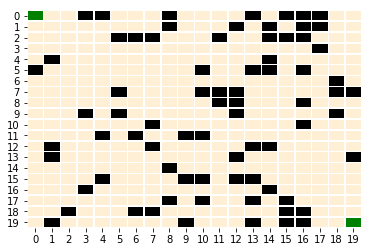

---------BFS---------


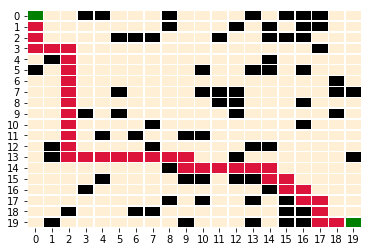


---------DFS---------
Goal Reached


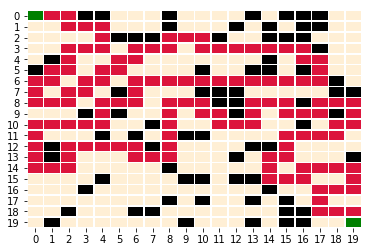


---------Improved DFS---------
Goal Reached


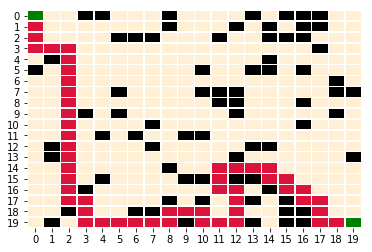

 
 ---------A* -Manhattan---------
Goal Reached


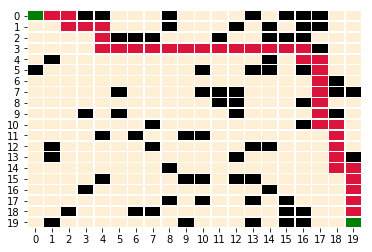


 ---------A* Eucledian---------
Goal Reached


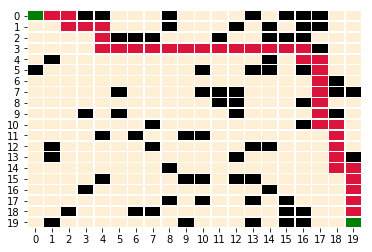


 ---------BD-BFS---------
Intersection at cell:
(10, 8)
Goal Reached


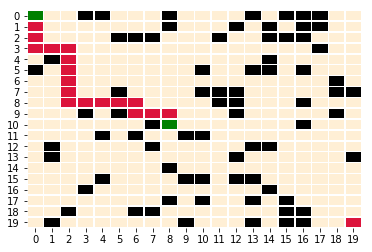

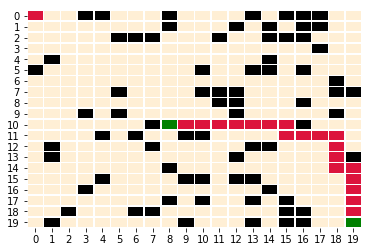

            path_length    time nodes_explored max_fringe_size
BFS                  39    0.01            323              18
DFS                 129  0.0064            238              89
IDFS                 53  0.0012             59              44
A_Mahnattan          39  0.0159            264              36
A_Euclidean          39  0.0182            322              19
BD_BFS               39  0.0361            250              17


In [0]:
solve_maze()

## Maze Solvability (2. 3)
Given dim, how does maze-solvability depend on p? For a range of p values, estimate the probability that
a maze will be solvable by generating multiple mazes and checking them for solvability. What is the best
algorithm to use here? Plot density vs solvability, and try to identify as accurately as you can the threshold p0
where for p < p0, most mazes are solvable, but p > p0, most mazes are not solvable.

In [0]:
def maze_solvability_p(dim):
    
    n_trials = 50
    goal = (dim-1, dim-1)
    #print(goal)
    percent_solvable = []
    
    for p in range(0, 11, 1):

        p = p/10.0
        success = 0
        
        for i in range(n_trials):

            maze = generate_maze(dim, p)
            is_goal_reached, prev_list, count_of_nodes, max_fringe_size  = improved_DFS(maze, start, goal)

            if(is_goal_reached):
                success = success + 1
        percent_solvable.append((success/n_trials)*100)
        #print("Success = ", success)

    #print(probability_solvable)
    x = np.arange(0,1.1,0.1)
    plt.clf()
    plt.cla()
    plt.close()
    sns.set(style="whitegrid", color_codes=True)
    pal = sns.color_palette("Greens", len(percent_solvable))
   
    ax = sns.barplot(x.round(1), percent_solvable, palette=np.array(pal[::-1]))
    
    for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
    _ = ax.set_ylim(0,120) 
    plt.yticks(np.arange(0,120,20))
    plt.xlabel("p")
    plt.ylabel("Success Percent")
    plt.title("Density vs solvability for dim = " + str(dim) + ", #trials = "+ str(n_trials))
 
    plt.show()
   



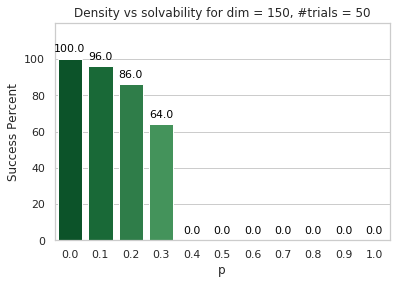

In [89]:
dim = 150
start = (0,0)
maze_solvability_p(dim)


##2.4
For p in [0; p0] as above, estimate the average or expected length of the shortest path from start to goal. You
may discard unsolvable maps. Plot density vs expected shortest path length. What algorithm is most useful
here?

In [0]:
## function to find out the expected or average length of the shortest path from start to goal  

def average_shortest_path(dim):
    
    goal = (dim-1, dim-1)
    average_path = []
    
    for p in range(0,4):
        p = p/10.0
        num_trials = 50 
        
        sum_path = 0
        for n in range(num_trials):
            
            maze = generate_maze(dim, p)
            
            is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = BFS(maze, start, goal)
           
            
            if is_goal_reached:
                path_len = path_length(goal, prev_list, start)
                sum_path += path_len
        avg_path = math.floor(sum_path / num_trials)
        average_path.append(avg_path)
    
    x  = np.arange(0,0.4,0.1)
    print(x)
    print(average_path)
    
    
    sns.set(style="whitegrid", color_codes=True)
    pal = sns.color_palette("Greens", len(average_path))
   
    ax = sns.barplot( x.round(1) , average_path, palette=np.array(pal[::-1]))
    for p in ax.patches:
             ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                 textcoords='offset points')
    #_ = ax.set_ylim(0,120) 
    #plt.yticks(np.arange(0,120,20))
    
    plt.xlabel('p')
    plt.ylabel('Average shortest path length')
    plt.title('Density vs expected shortes path length, dim='+ str(dim))
    plt.show()


[0.  0.1 0.2 0.3]
[299, 293, 263, 151]


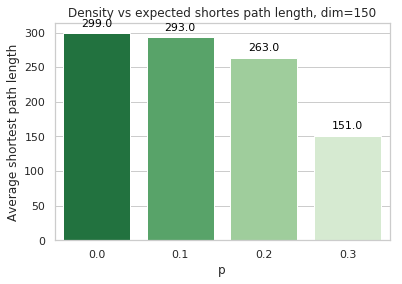

In [217]:
average_shortest_path(150)

##2.5
Is one heuristic uniformly better than the other for running A? How can they be compared? Plot the relevant
data and justify your conclusions.


In [0]:

##some work to solve - nodes explored ##

def compare_A_star(dim, p):
  
  n_trials = np.arange(1,6,1)
  goal = (dim-1, dim-1)
  
  df_manhattan = pd.DataFrame( columns = ['n_trials','time', 'nodes_explored', 'path_length', 'max_fringe_size'], index = n_trials)
  df_euclidean = pd.DataFrame( columns = ['n_trials','time', 'nodes_explored', 'path_length', 'max_fringe_size'], index = n_trials)
  
  i = 1
  
  while i <= len(n_trials):
    
    
    path_length = 0
    maze = generate_maze(dim, p)

    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "manhattan")
    current_time = round(time.time() - start_time, 4)

    if(is_goal_reached):
          path_length = display_path(maze,prev_list,start,goal)
          
    else:
      continue

    df_manhattan.loc[i]["n_trials"] = i
    df_manhattan.loc[i]["time"] = current_time
    df_manhattan.loc[i]["nodes_explored"] = count_of_nodes
    df_manhattan.loc[i]["path_length"] = path_length
    df_manhattan.loc[i]["max_fringe_size"] = max_fringe_size
    
    
    start_time = time.time()
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, visited = A_star(maze, start, goal, "eucledian")
    current_time = round(time.time() - start_time, 4)

    if(is_goal_reached):
          path_length = display_path(maze,prev_list,start,goal)
    
    df_euclidean.loc[i]["n_trials"] = i
    df_euclidean.loc[i]["time"] = current_time
    df_euclidean.loc[i]["nodes_explored"] = count_of_nodes
    df_euclidean.loc[i]["path_length"] = path_length
    df_euclidean.loc[i]["max_fringe_size"] = max_fringe_size
    
    i = i+1
    
    
  print(df_manhattan)
  print(df_euclidean)
  
  width = 0.35   
  plt.bar( n_trials + width, "time", width, data = df_euclidean, label = "euclidean")
  plt.bar( n_trials, "time",width = 0.35,  data = df_manhattan, label = "manhattan" )
  plt.legend(loc='best')
  plt.ylabel("Execution time (in s)")
  plt.xlabel("Trial number")
  plt.show()
  
  width = 0.35   
  plt.bar( n_trials + width, "nodes_explored", width, data = df_euclidean, label = "euclidean")
  plt.bar( n_trials, "nodes_explored",width = 0.35,  data = df_manhattan, label = "manhattan" )
  plt.legend(loc='best')
  plt.ylabel("Nodes Explored")
  plt.xlabel("Trial number")
  plt.show()
  
  width = 0.35   
  plt.bar( n_trials + width, "max_fringe_size", width, data = df_euclidean, label = "euclidean")
  plt.bar( n_trials, "max_fringe_size",width = 0.35,  data = df_manhattan, label = "manhattan" )
  plt.legend(loc='best')
  plt.ylabel("Max Fringe Size")
  plt.xlabel("Trial number")
  plt.show()
  

  n_trials     time nodes_explored path_length max_fringe_size
1        1   8.6488          10464         299             917
2        2  11.1237          11902         299             968
3        3   7.7629           9886         299             859
4        4   8.5513          10332         299             848
5        5   6.3444           8870         299             806
  n_trials     time nodes_explored path_length max_fringe_size
1        1   23.518          17938         299             144
2        2  23.9677          17930         299             141
3        3  24.0065          18011         299             149
4        4  24.1758          17981         299             144
5        5  23.8533          17910         299             135


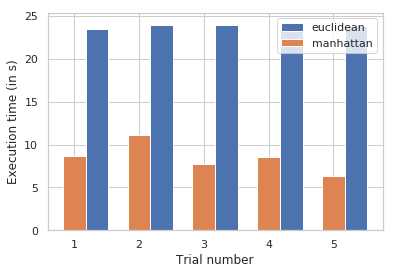

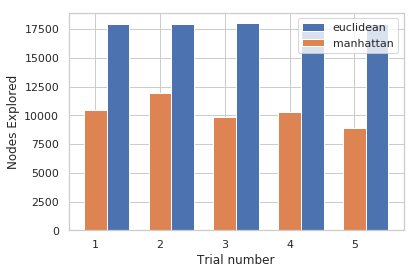

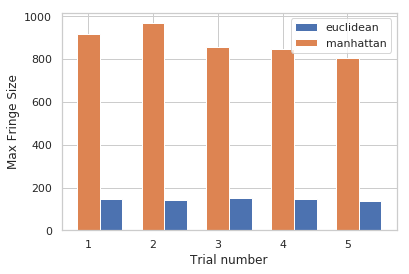

In [193]:
dim = 150
p = 0.2
compare_A_star(dim, p)


##2.8
On the same map, are there ever nodes that BD-DFS expands that A doesn't? Why or why not? Give an
example, and justify.

In [28]:
# 2.8 Show that BD-BFS expands node that A_star doesnot
dim = 10
p = 0.2
start = (0,0)
goal = (dim-1, dim-1)
bfs_visited = []
astar_visited = []

print("Cells which are explored by BD-BFS and not by A_star for 5 such mazes: ")
for n in range(5):
            
    maze = generate_maze(dim, p)
            
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, bfs_visited = BFS(maze, start, goal)
    is_goal_reached, prev_list, count_of_nodes, max_fringe_size, astar_visited = A_star(maze, start, goal, "manhattan")
    
    diff = set(bfs_visited) - set(astar_visited)
    print(diff)

Cells which are explored by BD-BFS and not by A_star for 5 such mazes: 
{(9, 0), (7, 0), (8, 0), (6, 0), (0, 7), (0, 6), (0, 9), (0, 3), (0, 8)}
{(9, 0), (7, 0), (3, 0), (8, 0), (6, 0), (2, 0), (5, 0), (0, 9), (0, 8)}
{(2, 9), (2, 8), (1, 5), (0, 6), (3, 9), (1, 6), (0, 5), (1, 8), (0, 4), (0, 9), (0, 8), (1, 7)}
{(9, 0), (8, 3), (7, 0), (9, 1), (8, 2), (8, 1), (9, 2), (8, 0), (9, 3), (0, 7), (0, 6), (1, 8), (1, 9), (9, 4), (1, 7), (0, 9), (0, 8)}
{(0, 9)}


##Bonus
Bonus: How does the threshold probability p0 depend on dim? Be as precise as you can.
2

In [0]:
def maze_solvability_p_bonus():
    
    #dim_range = np.arange(10,15,1)
    dim_range = np.arange(50,250,50)
    p_range = np.arange(0.1, 0.4, 0.1)  
    
    df = pd.DataFrame(index= dim_range,  columns = p_range)
   
    
    for dim in dim_range:
      
      print("dim = ", dim)
      n_trials = 50
      goal = (dim-1, dim-1)
      percent_solvable = []

      for p in p_range:

         
          success = 0

          for i in range(n_trials):

              maze = generate_maze(dim, p)
              is_goal_reached, prev_list, count_of_nodes, max_fringe_size  = improved_DFS(maze, start, goal)

              if(is_goal_reached):
                  success = success + 1
                  
          df.loc[dim][p] = (success/n_trials)*100
#           percent_solvable.append((success/n_trials)*100)
        

    
    print(df)
    
    
    
    #colors = ['rosybrown','firebrick' , 'violet', 'cyan', 'darkslategrey']
    colors = ["purple", 'olive', 'red', 'cyan']
    plot_legend_label = "dim "
    plot_legend_value = dim_range
    
    for i in range(df.shape[0]):
      plt.plot(df.iloc[i].index, df.iloc[i].values,
      label= plot_legend_label+"=%d"%(plot_legend_value[i]), 
               marker='o', color=colors[i])
      
      plt.legend()
    
    plt.xlabel('p')
    plt.ylabel('Success Percent')
    plt.xticks(p_range)
    #plt.title("Dimension vs time for p = "+ str(p)+ ", #trials = " + str(n_trials))
    plt.show()
    
    





dim =  50
dim =  100
dim =  150
dim =  200
    0.1 0.2 0.3 0.4
50   98  90  52   6
100  98  84  56   2
150  96  88  50   2
200  98  78  46   0


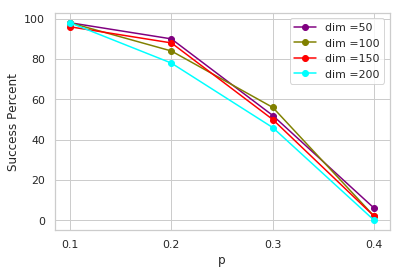

In [254]:
dim = 10
start = (0,0)
maze_solvability_p_bonus()
